In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
peng = sns.load_dataset("penguins")
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


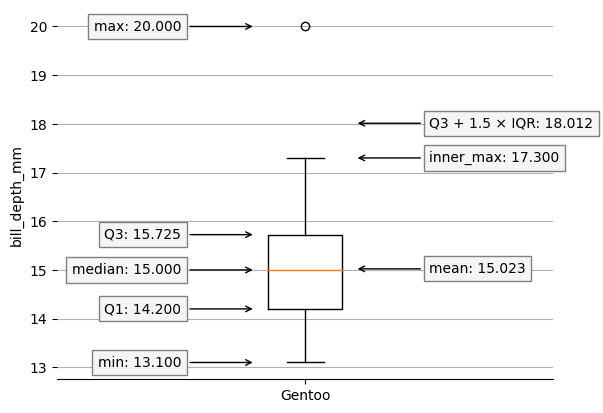

In [7]:
fig, ax = plt.subplots()

target_species = "Gentoo"
target_feature = "bill_depth_mm"

peng[target_feature].fillna(20, inplace=True)

data = peng[peng["species"] == target_species][target_feature]

ax.boxplot(data, 
           labels=[target_species])
ax.set(
    ylabel=target_feature,
)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y");


annotation_options = {
    "va": "center",
    "arrowprops": {"arrowstyle": "->"},
    "bbox": {"fc": "whitesmoke", "ec": "gray"},
}
quantiles = np.quantile(data, [0, 0.25, 0.5, 0.75, 1])
for name, q in zip(["min", "Q1", "median", "Q3", "max"], quantiles):
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(0.9, q),
        xytext=(0.75, q),
        **annotation_options,
        ha="right",
    )

iqr = quantiles[3] - quantiles[1]
for name, q in [
    ["mean", data.mean().item()],
    ["Q3 + 1.5 × IQR", quantiles[3] + 1.5 * iqr],
    ["Q1 - 1.5 × IQR", quantiles[1] - 1.5 * iqr],
    ["inner_max", data[data < (quantiles[3] + 1.5 * iqr)].max()]
]:
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(1.1, q),
        xytext=(1.25, q),
        **annotation_options,
        ha="left",
    )
pass

In [9]:
iris = pd.read_csv("../data/Iris.csv",
                  encoding="utf-8",
                  index_col = 0)

In [10]:
target_feature = "SepalLengthCm"

iris_groupby_species = {
    name: df[target_feature].to_numpy() for name, df in iris.groupby("Species")
}

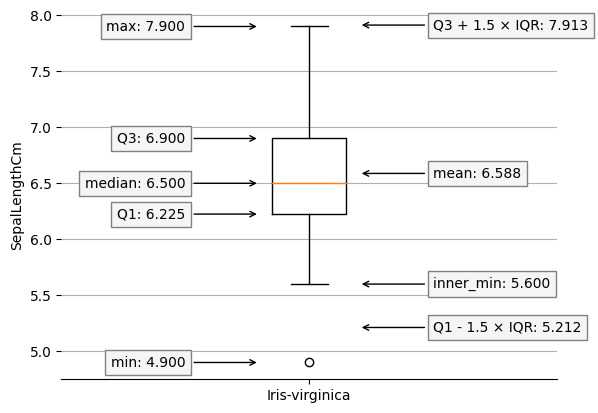

In [14]:
fig, ax = plt.subplots()

target_species = "Iris-virginica"

data = iris_groupby_species[target_species]

ax.boxplot(data, labels=[target_species])
ax.set(
    #title="상자 수염 그림",
    ylabel=target_feature,
)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y")

annotation_options = {
    "va": "center",
    "arrowprops": {"arrowstyle": "->"},
    "bbox": {"fc": "whitesmoke", "ec": "gray"},
}
quantiles = np.quantile(data, [0, 0.25, 0.5, 0.75, 1])
for name, q in zip(["min", "Q1", "median", "Q3", "max"], quantiles):
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(0.9, q),
        xytext=(0.75, q),
        **annotation_options,
        ha="right",
    )

iqr = quantiles[3] - quantiles[1]
for name, q in [
    ["mean", data.mean().item()],
    ["Q3 + 1.5 × IQR", quantiles[3] + 1.5 * iqr],
    ["Q1 - 1.5 × IQR", quantiles[1] - 1.5 * iqr],
    ["inner_min", data[data > (quantiles[1] - 1.5 * iqr)].min()]
]:
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(1.1, q),
        xytext=(1.25, q),
        **annotation_options,
        ha="left",
    )